In [1]:

#  --> sequential --> short duration


In [2]:

# import libraries
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
# execute if warnings should be ignored
import warnings
warnings.filterwarnings('ignore')


In [3]:

# Input data files from windows:
# "C:\Users\dietm\Documents\Data Science_Didi\Projekt\Projekt Recognition\data_vehicle_recognition\" directory
import os


In [4]:

# preparing the filenames:
list_files = []

for dirname,_,filenames in os.walk('./data_vehicle_recognition/'):
    for filename in filenames:
        list_files.append(os.path.join(dirname,filename))
        
print(len(list_files))


525


In [5]:

# preparing the path:
#C:\Users\dietm\Documents\Data Science_Didi\Projekt\Projekt Recognition\data_vehicle_recognition\vehicles
root_dir = './data_vehicle_recognition/vehicles/'


In [6]:

# for reading images:
import cv2


In [7]:

# preparing datas and labels in lists:
data = []
labels = []
label_names = []

for label in os.listdir(root_dir):
    path = "./data_vehicle_recognition/vehicles/{0}/".format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        img = cv2.imread(path + image_path)
        img = cv2.resize(img, (100, 100))
        data.append(img)
        labels.append(label)
        if not label in label_names:
            label_names.append(label)


In [8]:

# labels unique:
label_names


['bike',
 'boat',
 'bus',
 'car',
 'cycle',
 'helicopter',
 'plane',
 'scooty',
 'truck']

In [9]:

# preparing right shape for datas/labels:
data = np.array(data)


In [10]:
data.shape

(525, 100, 100, 3)

In [11]:
labels = np.array(labels)

In [12]:
labels.shape

(525,)

In [13]:

# import for preparing labels:
from sklearn.preprocessing import LabelEncoder


In [14]:

# initialize and preparing:
le = LabelEncoder()
labels = le.fit_transform(labels)


In [15]:

# import for converting to categorical:
from tensorflow.keras.utils import to_categorical


In [16]:

labels = to_categorical(labels)


In [17]:

# right shape:
labels.shape,data.shape


((525, 9), (525, 100, 100, 3))

In [18]:

# before train/test/split --> a shuffle for both data sets with indices:
new = np.arange(525)


In [19]:
new

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [20]:

np.random.shuffle(new)


In [21]:
new

array([338,  94,  65, 523, 211,  95, 392, 340, 441, 387, 467, 476, 450,
       164, 146, 250, 377, 367, 242, 255, 445,  29,  25, 321, 324, 147,
        41,   9, 219, 437, 317, 126, 232, 144, 209, 483, 384,  92, 429,
        43, 181, 314, 283, 493, 486, 279, 357, 457, 451,  15, 163, 422,
        13, 197, 407, 365, 281,  27, 295, 114,  26, 320,  47,  99, 286,
       141, 207, 488, 480, 396,  57, 403, 501, 355, 373, 452, 419, 370,
       506,  61,  38, 193, 272, 240, 517, 358, 318, 485, 508, 265, 343,
       296, 465, 183,  45, 247, 402, 490,  21, 327, 433, 102,  39, 519,
       319, 421, 347, 175, 204, 217, 239, 156, 118, 426, 362, 345,   2,
       344, 474,  34,  70, 494, 434, 235, 161, 237, 315,  49, 261, 469,
         0, 128, 414, 269, 185,  62,   5, 301,  32, 214, 498, 187, 436,
       418, 408, 263, 353, 145,   7, 368, 337, 192, 287, 499, 379, 288,
       312, 179, 323, 158,  59, 199, 509, 515, 186, 510, 103, 227, 224,
       409, 130, 322, 177, 162, 399, 243, 374,  97,  54, 166,  8

In [22]:

# --> shuffle with indices:
data = data[new]
labels = labels[new]


In [23]:

# import for --> train/test/split
from sklearn.model_selection import train_test_split


In [24]:

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=33)


In [25]:

# import librarys from tensorflow for layers and models:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential


In [26]:

# create model:
num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(100, 100, 3), activation='relu'),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(9, activation='softmax'),  
])


In [27]:

# compile:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [28]:

# train:
history = model.fit(X_train,y_train,batch_size=32,epochs=8, validation_data=(X_test, y_test))


Epoch 1/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.1154 - loss: 948.7361 - val_accuracy: 0.1238 - val_loss: 779.6876
Epoch 2/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2081 - loss: 431.2361 - val_accuracy: 0.1905 - val_loss: 218.6804
Epoch 3/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4100 - loss: 111.9271 - val_accuracy: 0.3238 - val_loss: 41.6199
Epoch 4/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6350 - loss: 17.7357 - val_accuracy: 0.4000 - val_loss: 29.4796
Epoch 5/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8154 - loss: 4.4171 - val_accuracy: 0.4190 - val_loss: 26.8124
Epoch 6/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9289 - loss: 0.6398 - val_accuracy: 0.4000 - val_loss: 25.4787
Epoch 7/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9743 - loss: 0.2234 - val_accuracy: 0.4571 - val_loss: 24.8750
Epoch 8/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9882 - loss: 0.2197 - val_accuracy: 0.

In [29]:

# values of accuracy and loss:
history_df = pd.DataFrame(history.history)


In [30]:

history_df.tail(5)


,accuracy,loss,val_accuracy,val_loss
3,0.635714,15.546529,0.400000,29.479616
4,0.821429,4.320020,0.419048,26.812412
5,0.935714,0.527543,0.400000,25.478745
6,0.971429,0.273153,0.457143,24.875044
7,0.995238,0.083526,0.457143,23.953356


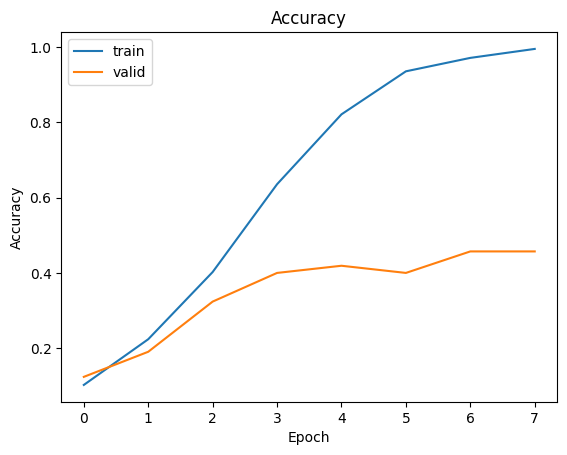

In [31]:
# visualization of accuracy and val_accuracy:
history_df[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

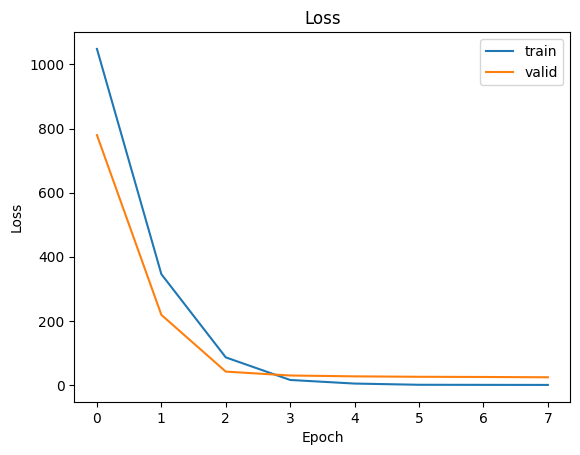

In [32]:

# visualization of accuracy and val_accuracy:
history_df[['loss','val_loss']].plot()
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"])
plt.show()


In [33]:

# evaluate:
model.evaluate(X_test,y_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4339 - loss: 23.4211


[23.95335578918457, 0.4571428596973419]

In [34]:

y_pred = model.predict(X_test) 
label_classes = y_pred.argmax(axis=-1)
label_classes


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([4, 1, 4, 5, 0, 0, 4, 7, 0, 4, 1, 4, 3, 8, 0, 7, 1, 5, 6, 6, 7, 0,
       3, 8, 0, 5, 5, 0, 3, 8, 0, 6, 0, 2, 3, 0, 6, 2, 7, 5, 7, 5, 7, 4,
       6, 4, 8, 1, 6, 2, 2, 8, 0, 2, 8, 3, 0, 7, 6, 1, 2, 5, 7, 2, 5, 0,
       1, 8, 4, 8, 7, 4, 8, 2, 0, 1, 1, 8, 2, 3, 7, 0, 5, 0, 4, 6, 0, 5,
       5, 8, 0, 4, 3, 1, 0, 1, 1, 0, 0, 6, 6, 1, 1, 5, 6], dtype=int64)

In [35]:
type(label_classes)

numpy.ndarray

In [36]:

# convert y_test to an array like label_classes
liste_indices = []
for i in y_test:
    a = 0
    for j in i:
        if j == 1:
            liste_indices.append(a)
        a += 1


In [37]:
liste_indices_arr = np.asarray(liste_indices)

In [38]:
liste_indices_arr

array([4, 5, 4, 2, 7, 4, 4, 1, 0, 4, 2, 4, 1, 7, 7, 0, 6, 5, 5, 6, 7, 4,
       3, 0, 0, 5, 8, 4, 2, 1, 4, 6, 0, 5, 3, 7, 1, 3, 7, 6, 7, 5, 7, 0,
       4, 4, 7, 3, 6, 6, 8, 6, 8, 6, 0, 3, 2, 3, 6, 1, 8, 5, 1, 3, 5, 0,
       6, 8, 4, 5, 3, 4, 2, 5, 0, 1, 6, 2, 2, 3, 1, 0, 8, 0, 4, 1, 0, 5,
       6, 1, 1, 4, 3, 1, 0, 1, 7, 7, 6, 6, 6, 1, 1, 4, 7])

In [39]:
y_test

array([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0.

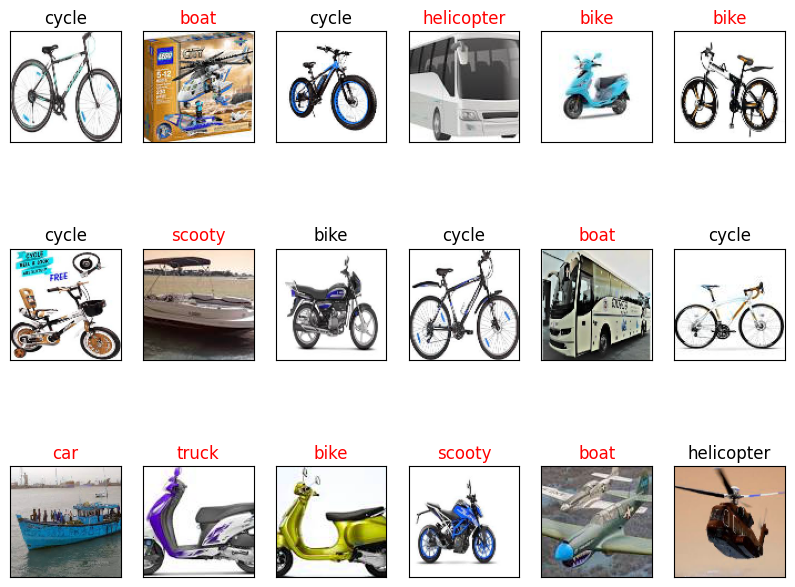

In [40]:

fig, ax = plt.subplots(3, 6, subplot_kw=dict(xticks=[], yticks=[]), figsize=(10,8))
for i, axi in enumerate(ax.flat):
    color = 'black'
    if label_classes[i]!=liste_indices_arr[i]:
        color='r'
    axi.imshow(X_test[i], cmap='Blues_r')
    axi.set_title(label_names[label_classes[i]], color=color)
plt.show()
